<pre style="text-align: right; width: 100%; font-size: 0.75em; line-height: 0.75em;">
+ ------------------------- + <br>
| 20/04/2025                | <br>
| Héctor Tablero Díaz       | <br>
| Álvaro Martínez Gamo      | <br>
+ ------------------------- + 
</pre>

# **Getting Started**

### **Setup & Imports**

The module is divided into the following structure:

- `image_gen.diffusion` contains different diffusers:
  - `VarianceExploding`
  - `VariancePreserving`
  - `SubVariancePreserving`
- `image_gen.metrics` has functions to estimate the quality of the generated images
- `image_gen.noise` contains 2 noise schedulers that control the amount of noise added at each timestep of the process:
  - `LinearNoiseSchedule`
  - `CosineNoiseSchedule`
- `image_gen.samplers` contains 4 samplers that can generate images from random noise:
  - `EulerMaruyama`
  - `ExponentialIntegrator`
  - `ODEProbabilityFlow`
  - `PredictorCorrector`
- `image_gen.visualization` has functions to display both the results and the progress of the generative process

In [1]:
import sys
sys.path.append('./..')

import os

import torch
from torch.utils.data import Subset
from torchvision import datasets
from torchvision.transforms import ToTensor

from image_gen import GenerativeModel
from image_gen.samplers import EulerMaruyama
from image_gen.diffusion import VarianceExploding

from image_gen.viualization import display_images

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\samplers\euler_maruyama.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### **Setup & Training**

The main class used is `GenerativeModel`, directly under `image_gen`. It can be called with the samplers, diffusers and noise schedulers mentioned previously. If nothing is set, the default initialization will be the same one as the one displayed in this notebook, using `VarianceExploding` together with `EulerMaruyama`.

In [2]:
# Set up the common variables
epochs = 50
digit = 3

seed = 42

In [3]:
# Load the dataset
data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

# Select a subset to speed up the training process
indices_digit = torch.where(data.targets == digit)[0]
data = Subset(data, indices_digit)

In [4]:
filename = f'saved_models/mnist_{digit}_ve_euler_{epochs}e.pth'

model = GenerativeModel(
    diffusion=VarianceExploding,
    sampler=EulerMaruyama
)

# TODO: Cambiar esto para que verifique que el archivo existe usando el módulo de os o alguna forma menos cutre q un try-except
if os.path.isfile(filename):
    model.load(filename)
else:
    model.train(data, epochs=epochs)
    # Tip: Save the models for them to be accessible through the dashboard
    model.save(filename)

### **Image Generation**

Images can be created with the `generate` method of the `GenerativeModel` class.

It can be configured with these parameters:
- `num_samples` (int): The number of images to generate
- `n_steps` (int): The number of iterations the sampler will go through
- `seed` (int, optional): An optional seed to get repeatable results
- `class_labels` (int/Tensor, optional): An integer or Tensor of ints that determines the class being generated in each image. If only an int is passed, all images will be of that class.
- `progress_callback` (Callable, optional): A function that will be called every few iterations of the model. Useful for displaying intermediate images or to estimate the remaining generation time.

Generating:   0%|          | 0/500 [00:00<?, ?it/s]

Step 0: t=1.000, mean=-0.008, std=1.482
Step 50: t=0.900, mean=0.069, std=4.308
Step 100: t=0.800, mean=0.058, std=3.800
Step 150: t=0.700, mean=0.121, std=3.084
Step 200: t=0.600, mean=0.103, std=2.374
Step 250: t=0.501, mean=0.133, std=1.796
Step 300: t=0.401, mean=0.138, std=1.323
Step 350: t=0.301, mean=0.130, std=0.967
Step 400: t=0.201, mean=0.130, std=0.682
Step 450: t=0.101, mean=0.131, std=0.472


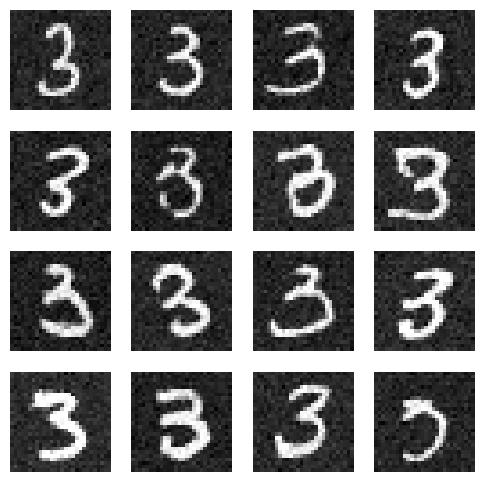

In [6]:
n_images = 16
samples = model.generate(n_images, seed=seed)
display_images(samples)